In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_excel('data_debtsustain1.xlsx')
print(df.head())  # This will display the first few rows of the DataFrame


   country_id      country  year  default_ext  default_ext2    rgdpgr  \
0           1  Philippines  1995            0             0  4.625225   
1           1  Philippines  1996            0             0  5.860348   
2           1  Philippines  1997            0             0  5.186412   
3           1  Philippines  1998            0             0 -0.514091   
4           1  Philippines  1999            0             0  3.346451   

   debt_ppgdebt  debt_dsbxgsi  debt_dsbgni  debt_dsbexp  ...  bop_cabgdp  \
0     72.438503     16.321244     7.015681    14.335826  ...   -2.341154   
1     61.525559     13.580253     6.235743    11.043362  ...   -4.176875   
2     52.054704      9.475806     5.233374     7.323985  ...   -4.600133   
3     54.418767     10.922605     5.740305     8.562020  ...    2.073440   
4     59.456455     22.437779     6.248303    16.672487  ...   -3.360311   

     kaopen  res_bopimp     er_app  inflation  gg_nlbgdp  gg_balgdp  \
0  1.055967   23.368701   2.45406

In [2]:
print(df.columns)



Index(['country_id', 'country', 'year', 'default_ext', 'default_ext2',
       'rgdpgr', 'debt_ppgdebt', 'debt_dsbxgsi', 'debt_dsbgni', 'debt_dsbexp',
       'debt_debtgni', 'debt_stdebtrat', 'debt_stres', 'debt_stxgsi',
       'bop_cabgdp', 'kaopen', 'res_bopimp', 'er_app', 'inflation',
       'gg_nlbgdp', 'gg_balgdp', 'mon_msres', 'mon_msgr', 'mon_msgdp'],
      dtype='object')


In [15]:
import numpy as np
X1 = df.drop(['country','default_ext','default_ext2'], axis=1)
col_names = X1.columns
y = df['default_ext']
y0 = df[df['default_ext']==0]['default_ext']
y1 = df[df['default_ext']==1]['default_ext']
print(X1.shape)
print(y.shape)
from sklearn.impute import SimpleImputer

# Create an imputer that replaces missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your feature data
XX = imputer.fit_transform(X1)

#X = (XX-np.min(XX)/np.max(XX)-np.min(XX))
X = (XX-np.mean(XX)/np.std(XX))
X0 = X[df['default_ext']==0]
X1 = X[df['default_ext']==1]
print(X0.shape)
print(X1.shape)
110/253

(363, 21)
(363,)
(253, 21)
(110, 21)


0.43478260869565216

In [5]:
ratio = np.sum(y1)/len(y)
print(np.sum(y1)/len(y))
80/ratio

0.30303030303030304


264.0

In [6]:
from sklearn.model_selection import train_test_split
num_defaults_train = 80
# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=num_defaults_train, random_state=42)
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, train_size=(int)(((1-ratio)*X1_train.shape[0])/ratio), random_state=42)

print("Train Ratio: ",X1_train.shape[0]/(X0_train.shape[0]+X1_train.shape[0]))
print("Test Ratio: ",X1_test.shape[0]/(X0_test.shape[0]+X1_test.shape[0]))

X_train = np.concatenate([X1_train,X0_train],axis=0)
X_test = np.concatenate([X1_test,X0_test],axis=0)
y_train = np.concatenate([y1_train,y0_train],axis=0)
y_test = np.concatenate([y1_test,y0_test],axis=0)

print(X1_train.shape[0],X0_train.shape[0],X1_test.shape[0],X0_test.shape[0])

# y1_train.shape[0]
X0_train.shape[0]+X1_train.shape[0]

Train Ratio:  0.30303030303030304
Test Ratio:  0.30303030303030304
80 184 30 69


264

In [8]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset

# Data Preprocessing

# Drop unnecessary columns (e.g., 'country_id', 'country') or encode them if needed
# Handle missing data if any

# Split data into features and target variable (assuming 'default_ext' is your target)





# Model Training and Evaluation

# Random Forest Classifier

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    criterion='gini',
    bootstrap=True,
    class_weight=None  # You can specify class weights if needed
)

rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

# Logistic Regression (Logit)

logit_classifier = LogisticRegression(
    C=1.0,  # You can adjust the regularization strength by changing C
    penalty='l2',  # Choose 'l1' or 'l2' for regularization type
    solver='lbfgs',  # Choose the solver algorithm
    max_iter=100,
    fit_intercept=True,
    multi_class='ovr'  # Choose 'ovr' or 'multinomial' for multiclass problems
)

logit_classifier.fit(X_train, y_train)
logit_pred = logit_classifier.predict(X_test)
logit_accuracy = accuracy_score(y_test, logit_pred)
print("Logistic Regression Accuracy:", logit_accuracy)
print(classification_report(y_test, logit_pred))

# XGBoost
import xgboost as xgb

# Create an XGBoost classifier with custom hyperparameters
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,        # Number of boosting rounds (trees)
    max_depth=10,             # Maximum depth of trees
    learning_rate=0.1,       # Learning rate (eta)
    reg_alpha=0.1,           # L1 regularization
    reg_lambda=0.1,          # L2 regularization
    random_state=42          # Set a random seed for reproducibility
)

# Train the model and make predictions
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)

#xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_pred))



Random Forest Classifier Accuracy: 0.8686868686868687
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        69
           1       0.79      0.77      0.78        30

    accuracy                           0.87        99
   macro avg       0.85      0.84      0.84        99
weighted avg       0.87      0.87      0.87        99

Logistic Regression Accuracy: 0.8484848484848485
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        69
           1       0.83      0.63      0.72        30

    accuracy                           0.85        99
   macro avg       0.84      0.79      0.81        99
weighted avg       0.85      0.85      0.84        99

XGBoost Classifier Accuracy: 0.8282828282828283
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        69
           1       0.72      0.70      0.71        30

    accuracy                   

In [9]:
# Multi-Layer Perceptron (MLP) Neural Network
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier with custom hyperparameters
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(200,50),
    solver="adam",
    activation='logistic',
    learning_rate_init=0.001,
    max_iter=1000,
    alpha=0.01,  # Adjust the alpha value to control the strength of L2 regularization
    random_state=42
)

# Train the model and make predictions
mlp_classifier.fit(X_train, y_train)
mlp_pred = mlp_classifier.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print("MLP Neural Network Accuracy:", mlp_accuracy)



print(classification_report(y_test, mlp_pred))


MLP Neural Network Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        69
           1       0.85      0.77      0.81        30

    accuracy                           0.89        99
   macro avg       0.88      0.85      0.86        99
weighted avg       0.89      0.89      0.89        99



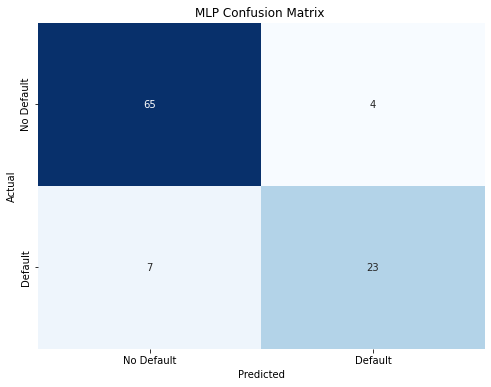

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, mlp_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'], 
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MLP Confusion Matrix ')
plt.show()


In [11]:
print(X.shape)

(363, 21)


Index(['country_id', 'year', 'rgdpgr', 'debt_ppgdebt', 'debt_dsbxgsi',
       'debt_dsbgni', 'debt_dsbexp', 'debt_debtgni', 'debt_stdebtrat',
       'debt_stres', 'debt_stxgsi', 'bop_cabgdp', 'kaopen', 'res_bopimp',
       'er_app', 'inflation', 'gg_nlbgdp', 'gg_balgdp', 'mon_msres',
       'mon_msgr', 'mon_msgdp'],
      dtype='object')


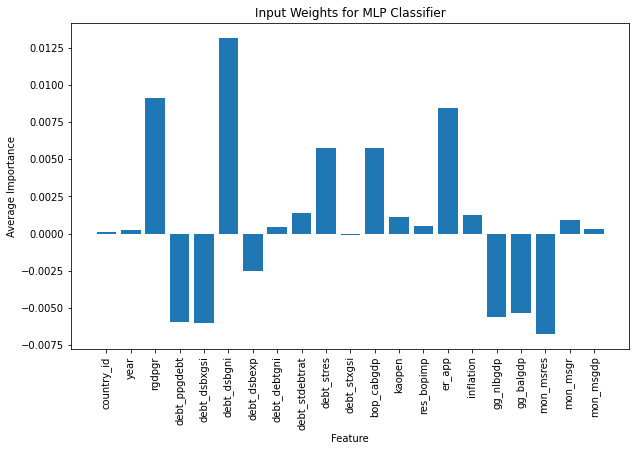

In [16]:

print(col_names)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have X as a NumPy array and col_names as a list of column names

# Create a DataFrame from X with column names
X_df = pd.DataFrame(X, columns=col_names)

# Assuming you have calculated avg_importance
input_layer_weights = mlp_classifier.coefs_[0]

# Compute the average importance across all neurons in the input layer
avg_importance = np.mean(input_layer_weights, axis=1)
# Create a bar chart for variable importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(avg_importance)), avg_importance)
plt.xticks(range(len(col_names)), col_names, rotation=90)  # Set the number of ticks to match the number of labels
plt.xlabel('Feature')
plt.ylabel('Average Importance')
plt.title('Input Weights for MLP Classifier')
plt.show()



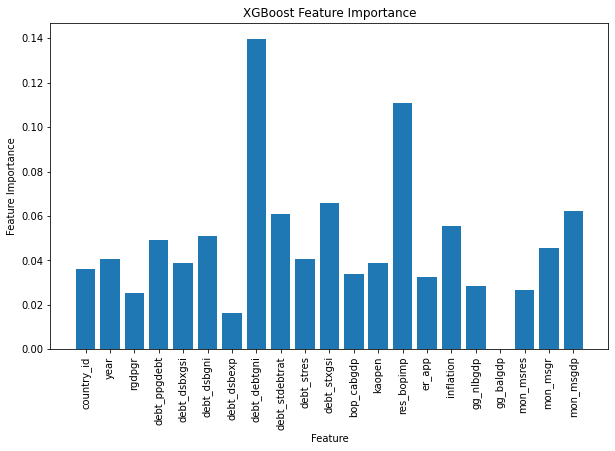

In [17]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming xgb_classifier is already trained
# Extract feature importances
importance_scores = xgb_classifier.feature_importances_

# Assuming you have the original DataFrame with column names as X_df
feature_names = col_names

# Create a custom feature importance plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importance_scores, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set the feature names as x-axis labels
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()


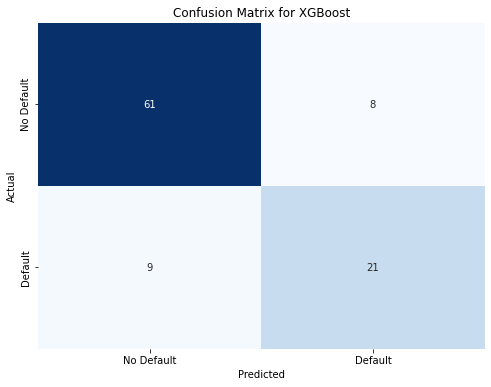

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, xgb_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [21]:
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp_classifier, X, y, n_repeats=100, random_state=0)
importance_scores = result.importances_mean
print(importance_scores)


[0.00498623 0.00041322 0.00853994 0.08867769 0.02272727 0.00614325
 0.01052342 0.14559229 0.03738292 0.09143251 0.04958678 0.02245179
 0.00443526 0.0292562  0.06231405 0.03146006 0.00774105 0.00829201
 0.00316804 0.01955923 0.01986226]


In [22]:
importance_scores

array([0.00498623, 0.00041322, 0.00853994, 0.08867769, 0.02272727,
       0.00614325, 0.01052342, 0.14559229, 0.03738292, 0.09143251,
       0.04958678, 0.02245179, 0.00443526, 0.0292562 , 0.06231405,
       0.03146006, 0.00774105, 0.00829201, 0.00316804, 0.01955923,
       0.01986226])

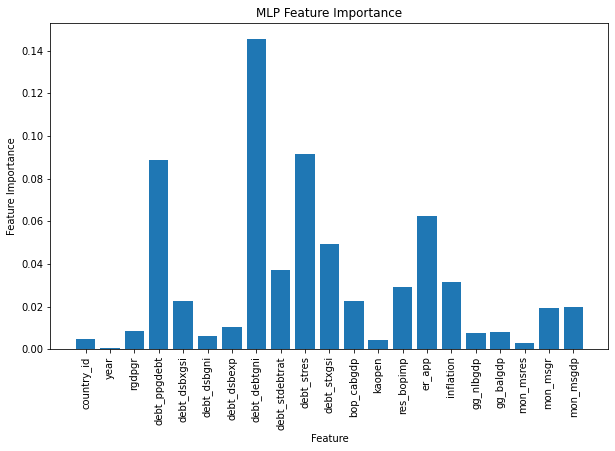

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importance_scores, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set the feature names as x-axis labels
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('MLP Feature Importance')
plt.show()
